# Parsing PDF file
## Task 2

#### Name: Aniruddha Indurkar
#### Date: 14/04/2019

Environment: Python 3.6.3 and Jupyter notebook Libraries used

* PyPDF2
* re
* nltk.collocation
* nltk.tokenise
* matplotlib
* itertools


## Introduction
This analysis extracts data from an pdf-based corpus containing 200 unit information. Data was extracted by reading the input file 'Data.pdf', splitting at the document by recognising patterns and then creating a list where each item in the list holds the full XML for each individual patent.

Data relating to outcome and synopsis was extracted using the package `PyPDF2` to extract values from specific pdf document. Similarly, the text associated with units for further pre-processing.

Text pre-processing was performed with the objective of extracting and transforming the information for each unit into a vector space model.  The pre-processing included tokenisation (unigrams and bigrams), stemming and removal of stopwords. Additionally, the most frequent and least frequent words were removed, and meaningful bigrams were identified.  The initial tokenised vocabulary of the corpus was 9690 words, which was reduced to 4906 words following pre-processing.

## Importing the module

In [21]:
# We make use of PyPDF2 to read the files
import PyPDF2
import re

## Opening the pdf and saving the file in variable

#### Reference of the code:
* Site: Stackoverflow
* Webpage title: How to read line by line in pdf file using PyPdf?
* url: https://stackoverflow.com/questions/2481945/how-to-read-line-by-line-in-pdf-file-using-pypdf
* Author: Sandeep
* Date: 05/05/2011

In [22]:
# Reading the pdf file
# The following code has been referred from stackoverflow from the site given below:
#https://stackoverflow.com/questions/2481945/how-to-read-line-by-line-in-pdf-file-using-pypdf

#author: Sandeep (May 5, 2011)
pdf_file = open('29389429.pdf', 'rb')

read_pdf = PyPDF2.PdfFileReader(pdf_file)


In [23]:
# The following code has been referred from stackoverflow from the site given below:
#https://stackoverflow.com/questions/2481945/how-to-read-line-by-line-in-pdf-file-using-pypdf

#author: Sandeep (May 5, 2011)

# We store the number of pages
number_of_pages = read_pdf.getNumPages()
page = read_pdf.getPage(1)
page_content = page.extractText()
data=page_content.encode('utf-8')

# Converting the data into string
data=str(data)

# Observe the file pattern

### We observe a pattern that the information for a particular unit including the synopsis and outcome is seperated by a ']'. Thus, we exploit this observation and split the data for a units accordingly. 

For example,

b"CPS5002\nThis unit will explore the history, theory and principles\nof Developmental Observation and its relevance to\nclinical and consultative work with children and\nadolescents. There will be a consideration of the\nnature of the links between observation and the\ndevelopmental theories. Students will be able to\nexplore these areas both through the context of the\ncourse work and prescribed observations of children\nin their naturalistic settings.\n ['evaluate the relevance of observation skills to the\nunderstanding of children and adolescents in both\ntherapeutic and consultative work;', 'analyse the\nnature of links between observation and the\ndevelopmental theories;', 'monitor and evaluate their\nown responses to what is observed and critically apply\nthese in their work;', 'critically evaluate their\nobservations in discussion and in written assignments;\nand', 'integrate Developmental Observation theory,\nhistory and principles with observation experiences\nand their clinical work, demonstrating these processes\nin accounts of their own learning.'].

### Similarly, the key distinguisher between outcome and synopsis is '['.
### We make use of regex to extract the unit code.



### Extracting the unit from PDF

In [24]:
def unit_code(string):
    #The pattern we find in the pdf document. Split according to the '['
    a1=string.split("[")
    
    # Slice for unit information with synopsis
    # we expect the unit code to be within the first 10 characters.
    a2=a1[0][:10]

    #return a valid unit code.
    if len(re.findall("\w{3}\d{4}",str(a2)))!=0:
        
        return re.findall("\w{3}\d{4}",str(a2))[0]

### Extracting the Synopsis

In [25]:
def Synopsis(data):
    a1=data.split("[")
    
    return re.sub("\\\\n"," ",a1[0][11:])

### Extracting the outcome

The list of outcomes ends with ";" . In this case we replace these by ".", in order to create stop words, so that the normalisation process will be correct.

In [26]:
def Outcome(data):
    # Split to get the string we want
    a1=data.split("[")
    
    # removing unwanted tokens
    out=re.sub("\\\\n"," ","["+a1[1]+"]")
    out=re.sub("\\\\","",out)
    
    # Subbing the ; with . ";" represents the end of sentence in token. We do that in order to normalise correctly
    out=re.sub(";",".",out)
    
    b1=re.findall("\[(.*?)]",out)
    
    # Cleaning the string
    out=re.sub("', '"," ",out)
    out=re.sub("\[","",out) 
    
    return re.sub("]","",out)

### Reading the entire data to extract information

In [27]:
number_of_pages = read_pdf.getNumPages()

# List to store information about each unit
a=list()

# Looping through the number of pages
for i in range(number_of_pages):
    
    page = read_pdf.getPage(i)
    page_content = page.extractText()
    data=page_content.encode('utf-8')
    data=str(data)
    
    # Substituting characters that are not required
    re.sub("\\\\n"," ",data)
    re.sub("\\\\","",data)
    
    # Title Synopsis and outcome are occuring on the start of every page hence they are removed
    data=re.sub("Title\\\\nSynopsis\\\\nOutcomes\\\\n","",data)
    k=data.split("]")    

   
    for i in k:
        # Dictionary containing synopsis and outcome
        ad=dict()

        units=unit_code(i)

        if units is not None:
            ad['Unit']=units  
            ad['Outcome']=Outcome(i)
            ad['Synopsis']=Synopsis(i)
            a.append(ad)


### Refining the dictionary

In [28]:
# Refining the dictionary, as not all pages are the same
for i in a:
    
    # Unwanted characters to be removed
    i['Outcome']=str(re.sub("\\\\","",i['Outcome']))
    i['Outcome']=str(re.sub("\.,","\. ",i['Outcome']))
    i['Outcome']=str(re.sub("\'"," \' ",i['Outcome']))
    i['Outcome']=str(re.sub("\'","",str(i['Outcome'])))


In [29]:
import collections
# Sample outcome
for i in a:
    if i['Unit']=="ATS1040":
        print(i['Outcome'])
        print("==================")
        print(i)
## We observe that 'ATS2172' unit is repeated 2 times

  Students who have completed this unit will have an enhanced ability to critically analyse and evaluate the concepts employed in, and the doctrines accepted by, the world  s religions, as well as to put forward ideas and arguments of their own in a clear and coherent way. ("Monash Graduates will be critical and creative scholars who apply research skills to a range of challenges, and communicate perceptively and effectively.") Students who have completed this unit will have an enhanced knowledge of theories of religion, and of key issues in contemporary studies of religion.  
{'Unit': 'ATS1040', 'Outcome': '  Students who have completed this unit will have an enhanced ability to critically analyse and evaluate the concepts employed in, and the doctrines accepted by, the world  s religions, as well as to put forward ideas and arguments of their own in a clear and coherent way. ("Monash Graduates will be critical and creative scholars who apply research skills to a range of challenges, 

### Unit list containing the combined Synopsis and Outcome text

In [30]:
# To combine outcome and synopsis to create a new list
unit_list=list()

for i in a:
    unit_dict=dict()
    unit=i["Unit"]
    x=re.sub("\.\'","\.",i['Outcome']+" "+i['Synopsis'])
    unit_dict["unit"]=unit
    
    # Removing unwanted characters
    unit_dict["text"]=re.sub("\\\\","",str(x))
    
    unit_list.append(unit_dict)


### Combining the text for all the units

In [31]:
# Combining all the units to tokens and calculate bigrams
doc_dict=dict()
j=""
for i in a:
    x=re.sub("\.\'","\.",i['Outcome']+" "+i['Synopsis'])
    
    # Refining the dictionary
    j=j+re.sub("\\\\","",str(x))
    j=re.sub("\.\ \'",".",str(j))
    j=re.sub("\.\'",".",str(j))
    j=re.sub(";",".",str(j))
    
doc_dict['29389429']=j


## Preprocessing the abstracts 

The goal of text pre-processing is to convert unstructure text into structured data. For this analysis, a sparse count vector is produced.

Pre-processing of the abstract text is achieved using the following steps. Here we consider as the order to be very important:
  -   Conversion to lower case for only the first element of the sentence and keeping the middle words capital as it is
  -   Tokenising in order to obtain all the tokens with length greater than 3.
  -   We choose to then find the top 200 bigrams because, if we remove stop words first, then we miss out on a few bigrams.
  -   Retokenise for a particular unit in order to obtain bigrams.
  -   Removal of stopwords context dependent and context independent
  -   Porting and stemming the unique tokens obtained
  -   Stemming the individual tokens in the unit in order to obtain the count

### To obtain the count we stem the initial tokens. For example, if unit contains two words "beautiful" and "beautifully" then to obtain a count of 2 for the dictionary vocabulary word "beauti" we need to stem them as well.


## 1. Normalise

#### Function to convert the first word of the sentence to lower

In [32]:
def first_lower(line):
    list1=line.split()
    #print(list1)
    
    list1[0]=list1[0].lower()
    
    if not re.findall("\w+",str(list1[0])):
        list1[1]=list1[1].lower()
    
    for i in list1:   
        c= " ".join(list1)
        
    return c

#### Function to convert the paragraph to sentences and lower the first word of the sentence
* The below code is referenced from Tutorial 4 (FIT5196- Data Wrangling, Monash University)

In [33]:
# Returns the paragraph
import nltk.data
def text_sent(paragraph):
    
    #
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    
    sentences = sent_detector.tokenize(paragraph)
    j=""
    for sent in sentences:
        first_lower(sent)
        
        j=j+" "+first_lower(sent)
        
    return j

#### Normalising for the entire document as well as for individual units

In [34]:
# Normalising the entire dictionary
new_doc_dict=dict()
new_doc_dict['29389429']=text_sent(doc_dict['29389429'])


In [35]:
# Normalising the unit
for unit in unit_list:
    unit['text']=text_sent(unit['text'])
    

## 2. Tokenisation

In [36]:
from bs4 import BeautifulSoup as bsoup
import re
import os
import nltk
from nltk.collocations import *
from itertools import chain
import itertools
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer

The below code is reference from Tutorial 4 (FIT5196-Data Wrangling, Monash University S1 2019)

In [37]:
from nltk.tokenize import RegexpTokenizer 
### Tokenising using the provided regex
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")
doc_uni_tokens = tokenizer.tokenize(new_doc_dict['29389429'])

# Removing tokens with length less than 3
uni_tokens=[w for w in doc_uni_tokens if len(w)>=3]


## 2a. Tokenising individual unit  
Also, we remove token with length less than 3

In [38]:
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")

for i in unit_list:
    ## Removing tokens with len < 3
    unigram_tokens = tokenizer.tokenize(i['text'])
    i['uni_tokens']=[w for w in unigram_tokens if len(w)>=3]

## 3. Bigram tokens from the document

The below code is reference from Tutorial 4 (FIT5196-Data Wrangling, Monash University S1 2019)

In [39]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(uni_tokens)

bigram_finder.apply_word_filter(lambda w: len(w) < 3)# or w.lower() in ignored_words)

# Finding the top 200 bigrams
top_200_bigrams = bigram_finder.nbest(bigram_measures.pmi, 200)

bigrams_set=list(set(top_200_bigrams))

#print(bigrams_set)

## 4a. Retokenise and then remove context independent stopwords

The below code is reference from Tutorial 5 (FIT5196-Data Wrangling, Monash University S1 2019)

In [40]:
# Reading the stop words
stopwords=list()


with open("stopwords_en.txt","r") as words:
    for i in words.readlines():
        stopwords.append(i.strip('\n'))
# Set of unique stopwords
stopwords_set = set(stopwords)

# Retokenise to remove context independent stop words from the given list
for i in unit_list:
    from nltk.tokenize import MWETokenizer
    # Tokenise bigrams
    mwe_tokenizer = MWETokenizer(bigrams_set)
    
    # Retokenising them
    tokens_sw = mwe_tokenizer.tokenize(i['uni_tokens'])
    i['uni_tokens'] = [w for w in tokens_sw if w not in stopwords_set]


### Important note
- If we stem the words before removing the context independent words, a few words providing additional information about the unit would be captured.
- However, if lets say words "pollutants","polluting" and "pollutant" occur in 33% of the documents each exclusively. then if we stem them "pollut" word will occur in 99% of the documents and will be removed.
- It is for the same reason that we do not stem before removal of context dependent words.


### Creating a set of tokens with bigrams and unigrams unique to a unit

In [41]:
# Creating unit set of tokens to calculate the document frequency
for i in unit_list:
    i['re_set']=list(set(i['uni_tokens']))

In [42]:
# Set of unique tokens in a particular unit
token_count=list()

for i in unit_list:
    
    for j in i['re_set']:
        
        token_count.append(j)
        
len(token_count)

13201

In [43]:
# Sample output
for i in unit_list:
    
    if i['unit']=="APG5850":
        
        print(i['re_set'])
        print("==================")
        print(len(i['re_set'])) # Set of unique tokens
        
        print("==================")
        print(i['uni_tokens'])
        print("==================")
        
        print(len(i['uni_tokens'])) # List of tokens in the unit including repititions

['academically', 'graduate', 'results', 'skills', 'process', 'independently', 'literature', 'project', 'students', 'formulate', 'continue', 'demonstrate', 'command', 'conduct', 'written', 'research', 'independent', 'supervision', 'suitable', 'academic', 'thesis', 'production', 'critically', 'sophisticated', 'argument', 'sound', 'staff', 'develop', 'commenced', 'relevant', 'APG5849_Graduate', 'analyse']
32
['formulate', 'research', 'project', 'conduct', 'research', 'independently', 'demonstrate', 'command', 'relevant', 'literature', 'critically', 'analyse', 'relevant', 'academic', 'literature', 'develop', 'academically', 'sound', 'argument', 'demonstrate', 'sophisticated', 'written', 'skills', 'supervision', 'suitable', 'academic', 'staff', 'students', 'continue', 'conduct', 'independent', 'research', 'commenced', 'APG5849_Graduate', 'research', 'thesis', 'research', 'process', 'results', 'production', 'graduate', 'research', 'thesis']
43


## 4b. Removing context dependent stop words

The below code is reference from Exploring Pre-Processed text and Generating Features.ipynb (FIT5196-Data Wrangling, Monash University S1 2019)

In [44]:
import matplotlib
from nltk.probability import *

# It is the count of all unique tokens across the documents
freqdict=FreqDist(token_count)
tdict=dict(freqdict)

# Unique count of vocabulary in the document with frequency
len(tdict)

3566

### Plotting the frequency distribution

In [45]:
# We see that the word unit appears more than 160 times
freqdict.plot(25, cumulative=False)

<Figure size 640x480 with 1 Axes>

The below code is reference from Exploring Pre-Processed text and Generating Features.ipynb (FIT5196-Data Wrangling, Monash University S1 2019)

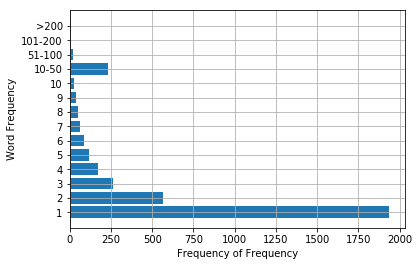

In [46]:
## Plotting the words with frequency of frequency as 1

ffd = FreqDist(freqdict.values())

from pylab import *
y = [0]*14

for k, v in ffd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 50:
        y[10] =  y[10] + v
     elif k >50 and k <= 100:
        y[11] =  y[11] + v
     elif k > 100 and k <= 200:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
        
x = range(1, 15) # generate integer from 1 to 14
ytks =list(map(str, range(1, 11))) # covert a integer list to a string list
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-200')
ytks.append('>200')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
grid(True)

The graph above shows that there are a lot of words with frequency in between 1-10. infact aroung 90% of the words have the frequency less than 10 and hence will constitute as rare tokens and will get removed.

### Removing tokens with unit frequency more than 95% or less than 5%

* 95% for context dependent stop words
* 5% for rare tokens

#### However, there is a problem with this case that, bigrams such as "Nurse_practitioners" which are common in the nursing units get removed as the frequency in this case is not more than 5%.
#### We are losing out on important information pertaining to a particular unit.

#### Ideally, if we are having bigrams then we should not filter them for a frequency of 5%. There should be a different threshold for bigrams.

In [47]:
## Token list after removing context dependent stop words
new_token_list=list()

for k,v in tdict.items():
    # Frequency of 95% for context
    if v>10 and v<=190:
        new_token_list.append(k)
        
len(new_token_list)

251

## Information about the unit list
unit_list objects contains:
* uni_tokens: individual tokens in a single unit.
We need to stem these tokens in order to find the frequency

In [48]:
# Sample output
for i in unit_list:
    
    if i['unit']=="APG5850":
        
        print(i['re_set'])
        print("==================")
        
        print(len(i['re_set'])) # Set of unique tokens
        print("==================")
        
        print(i['uni_tokens'])
        print("==================")
        
        print(len(i['uni_tokens'])) # List of tokens in the unit including repititions

print("==================")
print(new_token_list) # contains no bigrams

['academically', 'graduate', 'results', 'skills', 'process', 'independently', 'literature', 'project', 'students', 'formulate', 'continue', 'demonstrate', 'command', 'conduct', 'written', 'research', 'independent', 'supervision', 'suitable', 'academic', 'thesis', 'production', 'critically', 'sophisticated', 'argument', 'sound', 'staff', 'develop', 'commenced', 'relevant', 'APG5849_Graduate', 'analyse']
32
['formulate', 'research', 'project', 'conduct', 'research', 'independently', 'demonstrate', 'command', 'relevant', 'literature', 'critically', 'analyse', 'relevant', 'academic', 'literature', 'develop', 'academically', 'sound', 'argument', 'demonstrate', 'sophisticated', 'written', 'skills', 'supervision', 'suitable', 'academic', 'staff', 'students', 'continue', 'conduct', 'independent', 'research', 'commenced', 'APG5849_Graduate', 'research', 'thesis', 'research', 'process', 'results', 'production', 'graduate', 'research', 'thesis']
43
['results', 'skills', 'process', 'literature', '

## 6. Using Porter Stemmer to stem the unigrams

We stem only the unigrams as stemming the bigrams is not useful

In [49]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

final_tokens_1 =[]
# We make use of the unique token list 
for token in new_token_list:
    if "_" not in token:
        final_tokens_1 = final_tokens_1 + [stemmer.stem(token)]
    else:
        final_tokens_1=final_tokens+[token]

# These are the set of Unique tokens left after aggregating the porter stemmed tokens
final_tokens_1=list(set(final_tokens_1))

len(final_tokens_1) # 200 unique tokens

200

#### We stem the bigrams in particular unit in order to obtain the count from them

In [50]:
# We stem the unigrams in the list of tokens inside each unit
# Note: retokenised key contains list of all tokens inside one unit including unigram and bigrams

for i in unit_list:
    final_tokens=[]
    
    for token in i['uni_tokens']:
        if "_" not in token:
            final_tokens = final_tokens + [stemmer.stem(token)]
            
        # We do not want to stem the bigrams    
        else:
            final_tokens=final_tokens+[token]
    
    # Final tokens in unit list contains the tokens that need to be counted
    i['final_tokens']=final_tokens


## 7a. Creating the dictionary of vocabulary

In [51]:

count=1
diction_out=list()
final_tokens_1.sort()

for i in final_tokens_1:
    diction_out.append((i,count))
    count+=1
    
print(diction_out)


# Writing the dictionary
with open("29389429_vocab.txt", "w") as diction_file:
    
    for i in diction_out:
        
        diction_file.write(str(i[0])+":"+str(i[1])+"\n")


[('abil', 1), ('academ', 2), ('activ', 3), ('address', 4), ('advanc', 5), ('aim', 6), ('analys', 7), ('analysi', 8), ('analyt', 9), ('appli', 10), ('applic', 11), ('apprais', 12), ('approach', 13), ('area', 14), ('argument', 15), ('aspect', 16), ('assess', 17), ('australia', 18), ('australian', 19), ('awar', 20), ('base', 21), ('basic', 22), ('build', 23), ('busi', 24), ('capac', 25), ('care', 26), ('case', 27), ('challeng', 28), ('chang', 29), ('chosen', 30), ('clinic', 31), ('common', 32), ('commun', 33), ('complet', 34), ('complex', 35), ('comprehens', 36), ('concept', 37), ('conceptu', 38), ('conduct', 39), ('construct', 40), ('contemporari', 41), ('context', 42), ('control', 43), ('cover', 44), ('critic', 45), ('critiqu', 46), ('cultur', 47), ('current', 48), ('data', 49), ('debat', 50), ('demonstr', 51), ('describ', 52), ('design', 53), ('develop', 54), ('digit', 55), ('disciplin', 56), ('discuss', 57), ('diseas', 58), ('econom', 59), ('effect', 60), ('emphasi', 61), ('engag', 62

## 7b. Creating the output vector space model

In [52]:
c_list=list()
for j in unit_list:
    
    # Creating a list of lists to iterate through in order to write
    a_list=list()
    blist=list()

    for i in diction_out:
    
        
        if j['final_tokens'].count(i[0])!=0:
            blist.append((i[1],j['final_tokens'].count(i[0])))


    # Inorder to check the print output
    #print(j['unit']) 
    #print(count)
    #print("===================")
    #print(blist)
    #print("===================")
    
    a_list.append(j['unit'])
    a_list.append(blist)
    c_list.append(a_list)
    

# Writing the vector
with open("Output_countVec.txt", "w") as a_file:
    for i in c_list:
        a_file.write(i[0]+",")
        #print(i)

        count=0
        for j in i[1]:
          #  print(j)
            count+=1
            
            # We do not append the comma at the end
            if count==len(i[1]):
                    a_file.write(str(j[0])+":"+str(j[1]))
            else:

                a_file.write(str(j[0])+":"+str(j[1])+",")
        a_file.write("\n")
